In [49]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
boston_data_set = load_boston()
print(str(boston_data_set['DESCR']))

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [51]:
feature_names = boston_data_set['feature_names']
X = boston_data_set['data']
y = boston_data_set['target']

In [52]:
boston_dataframe = pd.DataFrame(X, columns=feature_names)
boston_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [53]:
boston_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


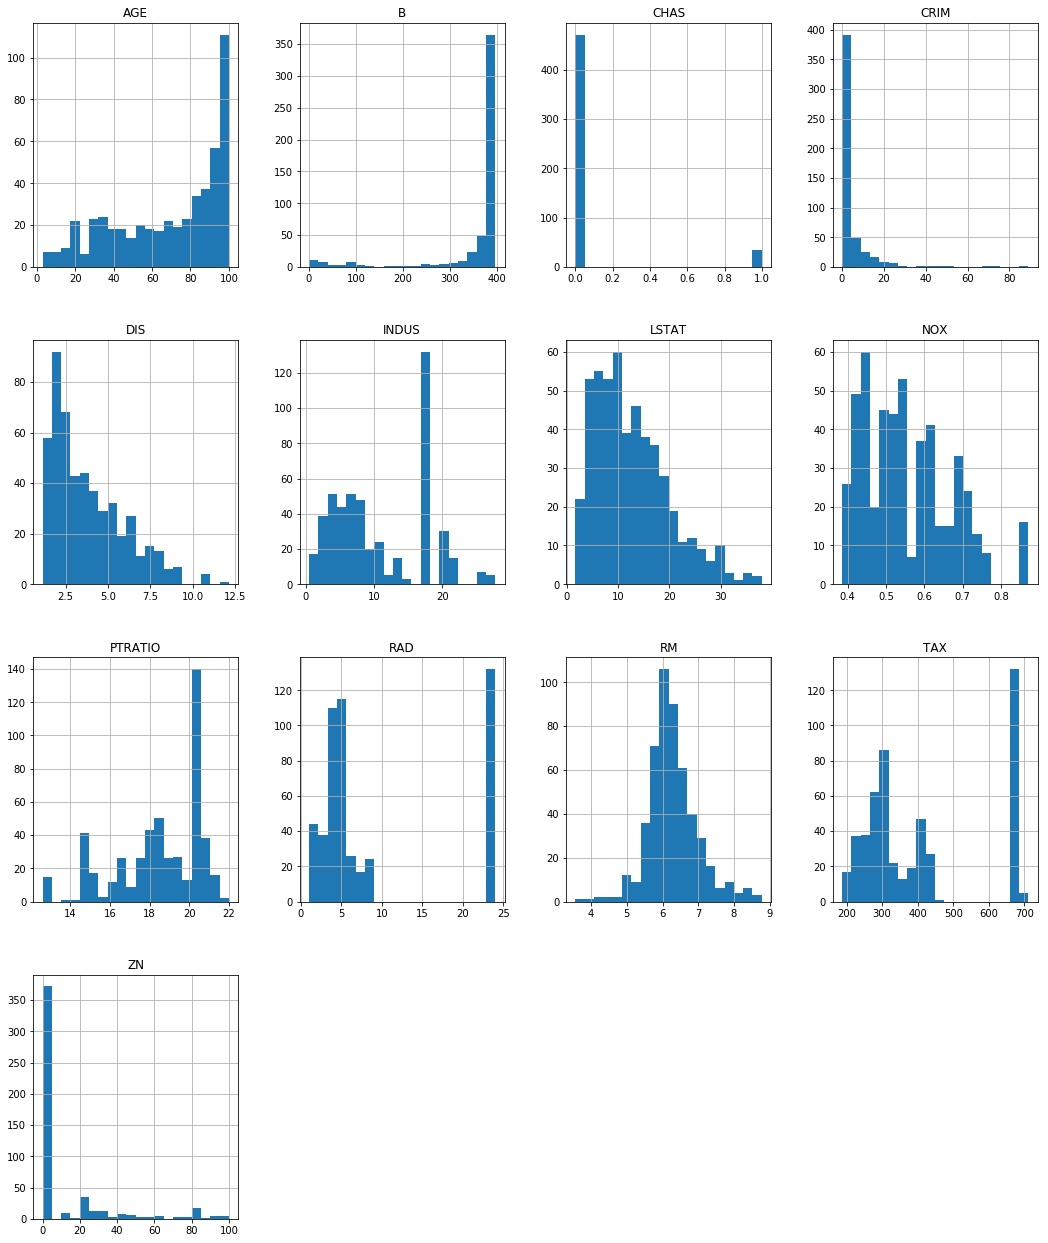

In [54]:
from pandas.plotting import scatter_matrix
boston_dataframe[feature_names].hist(bins=20,figsize=(18,22))
plt.show()

In [55]:
# Create a correlation matrix to see what features may be connected.
boston_cm = boston_dataframe.corr()
boston_cm['AGE'].sort_values(ascending=False)

AGE        1.000000
NOX        0.731470
INDUS      0.644779
LSTAT      0.602339
TAX        0.506456
RAD        0.456022
CRIM       0.350784
PTRATIO    0.261515
CHAS       0.086518
RM        -0.240265
B         -0.273534
ZN        -0.569537
DIS       -0.747881
Name: AGE, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dde3e48>,
      dtype=object)

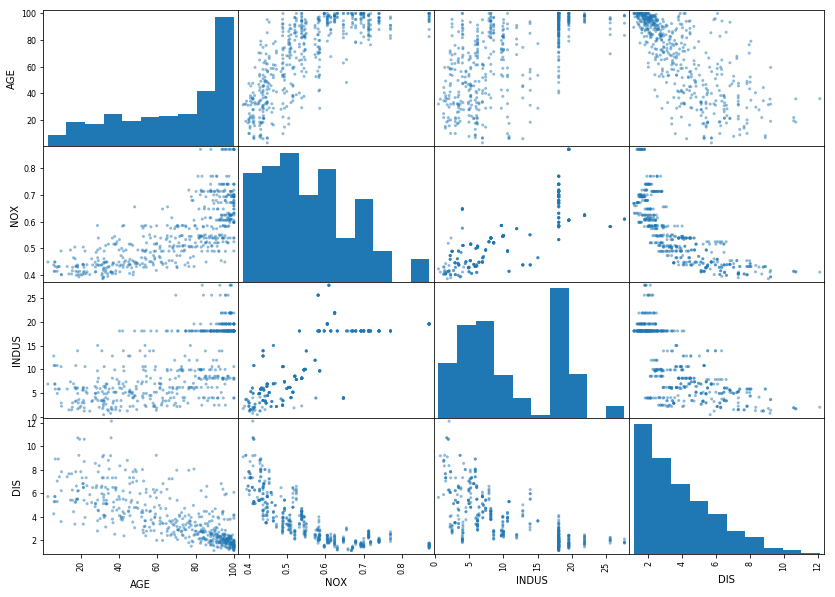

In [56]:
# Let's look at AGE, NOX, INDUS, and LSTAT - they seem to be positively correlated. 
# DIS is negatively correlated with AGE! Let's make a scatter matrix to visualize.
# scatter_matrix(boston_dataframe['AGE','NOX','INDUS','LSTAT'], figsize=(12,8))
candidate_names=['AGE', 'NOX', 'INDUS', 'DIS']
scatter_matrix(boston_dataframe[candidate_names], figsize=(14,10))

In [57]:
# Prep the data for learning the model
from sklearn.model_selection import train_test_split
# Hold back 20% for test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [58]:
# It is clear from the histograms, we need to scale this data during training and testing.
# This exercise will compare and contrast Lasso and Ridge regression (ElasticNet for grins later).
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

In [113]:
# Setup a pipeline to scale and fit the data and run through the GridSearchCV process
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

ridge_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('ridge_reg', Ridge(tol=1e-3,alpha=0.5))
])

ridge_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge_reg', Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [114]:
lasso_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lasso_reg', Lasso(tol=1e-3,alpha=0.1))
])

lasso_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso_reg', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.001, warm_start=False))])

In [104]:
lasso_grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso_reg', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.001, warm_start=False))])